In [15]:
!pip3 install decorator==5.0.9

import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import math
import os
import scipy

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.preprocessing import Normalizer
from pathlib import Path


seed = 0
np.random.seed(seed)

5926.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [16]:
#Path to the target csv file. This notebook should be in the same folder as the csv-data file 11_Autonomous_Systems.csv
path = os.getcwd()
print(path)

/Users/fmd/Desktop/USI/Semester_4/Data_Analytics/Autonomous-Systems


In [17]:
data = pd.read_csv(path+'/11_Autonomous_Systems.csv')
data


,ComputerNumber,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,5,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
149,150,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,151,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
151,152,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


After printing the table we can see that the computer number match the index number. The only difference is that the indexing starts with 0, and the column with the label ComputerNumber starts counting at 1. 

The other 21 columns have labels named after Greek Gods. We can infer that these lables represent the servers' names. It makes more sense to represent the dataframe with the ComputerNumber as index and the servers as columns. 

In [18]:
data = pd.read_csv(path+'/11_Autonomous_Systems.csv',index_col=0)
data

,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,Hephaestus,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
ComputerNumber,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


From what can be seen in the data frame, the value for each columns seem to be zeros and ones. let's check that there are no missing values and that they are in fact binary.

In [19]:
#Check that there aren't any missing values in the dataset
check=data.isnull().any().sum()
if check == 0:
    print('There are no missing values in the dataset')
else:
    print('There are missing values in the dataset')


There are no missing values in the dataset


In [20]:
#Check that all values are binary
check = data.columns[data.isin([0,1]).all()]
if len(check) == data.shape[1]:
    print('All values in the columns are binary')
else:
    print('Not all values in the columns are binary')


All values in the columns are binary



Upon confirmation that all values in the columns are binary, we can infer that the value one (1) represents a connection between a computer and a server and conversely, the value zero (0) shows no connection with the server. 

From here we can also infer that a computer can only be connected with a server and a server can only be connected with a computer. 

In [21]:
list_of_column_names = list(data.columns)
print(list_of_column_names)


['Zeus', 'Hera', 'Poseidon', 'Demeter', 'Athena', 'Apollo', 'Artemis', 'Ares', 'Aphrodite', 'Hephaestus', 'Hermes', 'Hestia', 'Dionysus', 'Granite', ' Mica', ' Shale', ' Quartz', ' Ruby', ' Atlas', ' Ryoken', ' Vulture']


In [50]:
#listing the conected computers cc and the not conected computers not_cc
cc=[]
not_cc=[]
for i in list_of_column_names:
    cc.append(len(data[data[i] == 1]))
    not_cc.append(len(data[data[i] == 0]))
print(cc)
print(not_cc)    


[23, 8, 9, 10, 52, 17, 10, 46, 17, 20, 8, 11, 11, 69, 12, 8, 16, 12, 8, 16, 17]
[130, 145, 144, 143, 101, 136, 143, 107, 136, 133, 145, 142, 142, 84, 141, 145, 137, 141, 145, 137, 136]


In [53]:
mean_connections=np.mean(cc)
print(mean_connections)

19.047619047619047


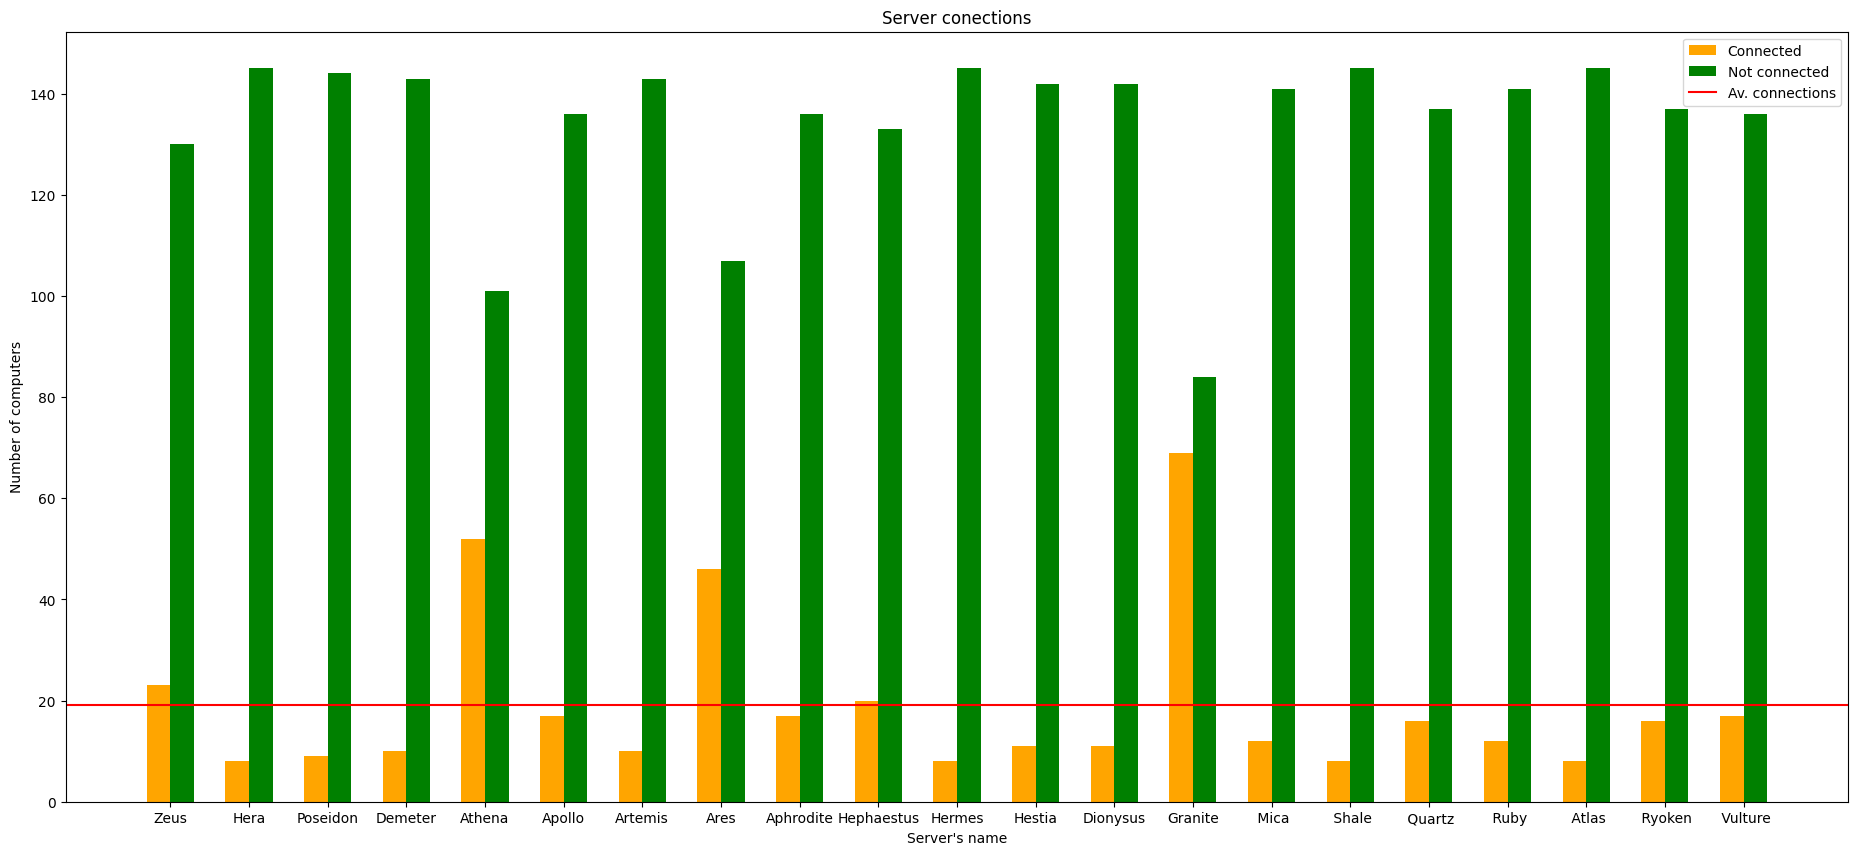

In [66]:
X_axis = np.arange(len(list_of_column_names))

plt.figure(figsize=(23,10))

line1=plt.bar(X_axis - 0.15, cc, 0.3, label = 'Connected',color='orange')
line2=plt.bar(X_axis+ 0.15, not_cc, 0.3, label = 'Not connected',color='green')
line3=plt.axhline(y=mean_connections,c='red', label= 'Av. connections')

plt.xticks(X_axis, list_of_column_names)
plt.xlabel("Server's name")
plt.ylabel("Number of computers")
plt.title("Server conections")
plt.legend(handles=[line1,line2,line3])

plt.show()
